In [13]:
import pandas as pd
from influxdb import DataFrameClient

# Connect to our InfluxDB database
client = DataFrameClient(host='159.89.128.179', port=8086, 
                        username='myusername', password='mypassword', database='mydatabase')

# Our query
query = '''SELECT mean("payload_fields_board_temperature") 
            FROM "mqtt_consumer"
            WHERE ("topic" = 'sensor-conference/devices/board_11/up') 
            AND time >= now() - 30m
            GROUP BY time(20s)
            fill(none)'''

# Query the database and dump the result into a pandas dataframe
df = client.query(query)

# Let's print out some basic info about this dataset
df['mqtt_consumer'].describe()

mean
count  17.000000
mean   22.865100
std     0.193552
min    22.580690
25%    22.902956
50%    22.902956
75%    22.902956
max    23.225710

In [14]:
# Format our data for plotting (https://stackoverflow.com/a/51955831)
df = pd.concat(df, axis=1)
df.columns = df.columns.droplevel()
df.columns = ['Temperature']

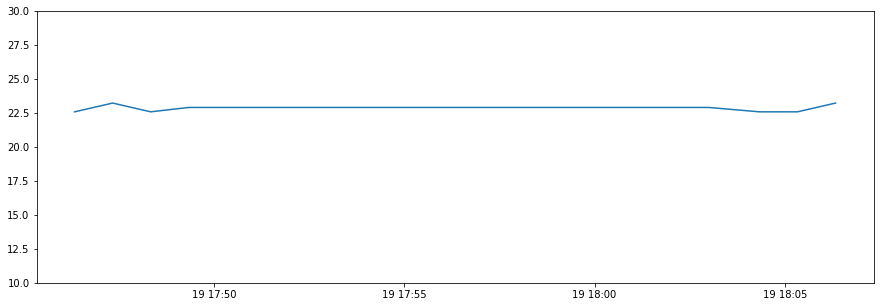

In [15]:
# Line chart example

%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize=(15,5))
plt.ylim(10, 30)
plt.plot(df['Temperature'])
